In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler

In [160]:
housing = fetch_california_housing()

In [162]:
type(housing.target)

numpy.ndarray

In [84]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, 
                                                      test_size=0.3, stratify=True, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size=0.3, stratify=True, random_state=42)

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [86]:
kl = keras.layers
input_ = kl.Input(shape=X_train.shape[1:]) #pula o index
hidden1 = kl.Dense(30, activation="relu")(input_)
hidden2 = kl.Dense(30, activation="relu")(hidden1)
concat = kl.Concatenate()([input_, hidden2])
output = kl.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [89]:
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4135 - val_loss: 0.4158
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4106 - val_loss: 0.4212
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4084 - val_loss: 0.4175
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4061 - val_loss: 0.4094
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4036 - val_loss: 0.4153
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4014 - val_loss: 0.4071
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3999 - val_loss: 0.4047
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3980 - val_loss: 0.4034
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3957 - val_loss: 0.4102
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3943 - val_loss: 0.4069

In [92]:
model.save("modelo1.h5")

In [64]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3736


In [66]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

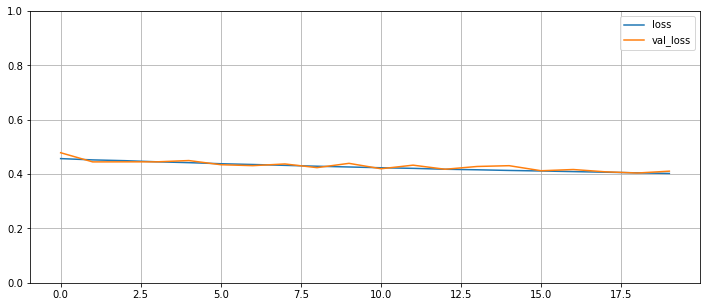

In [67]:
pd.DataFrame(hist.history).plot(figsize=(12,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Varias entradas 

In [93]:
kl = keras.layers
input_A = kl.Input(shape=[5], name="wide_input") 
input_B = kl.Input(shape=[6], name="deep_input") 
hidden1 = kl.Dense(30, activation="relu")(input_B)
hidden2 = kl.Dense(30, activation="relu")(hidden1)
concat = kl.Concatenate()([input_A, hidden2])
output = kl.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [94]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [95]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [96]:
hist = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2776 - val_loss: 1.4417
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9161 - val_loss: 0.8294
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7256 - val_loss: 0.6975
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6635 - val_loss: 0.6520
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6290 - val_loss: 0.6221
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6040 - val_loss: 0.5995
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5836 - val_loss: 0.5807
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5672 - val_loss: 0.5654
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5530 - val_loss: 0.5523
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5407 - val_loss: 0.5436

In [97]:
model.save("modelo2.h5")

In [49]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 1s 3ms/step - loss: 0.4220


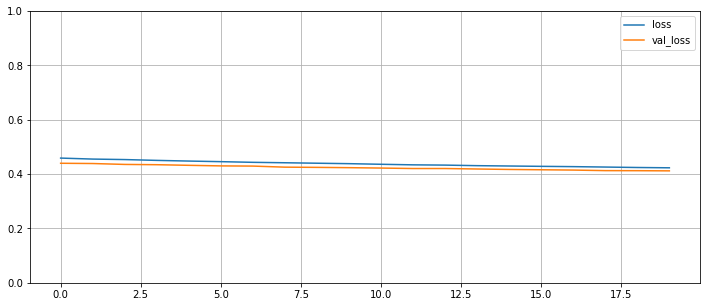

In [50]:
pd.DataFrame(hist.history).plot(figsize=(12,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Agora com varias saidas

In [98]:
kl = keras.layers
input_A = kl.Input(shape=[5], name="wide_input") 
input_B = kl.Input(shape=[6], name="deep_input") 
hidden1 = kl.Dense(30, activation="relu")(input_B)
hidden2 = kl.Dense(30, activation="relu")(hidden1)
concat = kl.Concatenate()([input_A, hidden2])
output = kl.Dense(1, name="main_output")(concat)
aux_output = kl.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [99]:
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [100]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [109]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("modelo1.h5", save_best_only=True)

In [110]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [111]:
hist = model.fit((X_train_A, X_train_B), [y_train,y_train], 
                     epochs=100, 
                     callbacks=[checkpoint_cb,early_stopping_cb],
                     validation_data=((X_valid_A, X_valid_B), [y_valid,y_valid]))

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4415 - main_output_loss: 0.4050 - aux_output_loss: 0.7696 - val_loss: 0.4572 - val_main_output_loss: 0.4219 - val_aux_output_loss: 0.7748
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4395 - main_output_loss: 0.4037 - aux_output_loss: 0.7618 - val_loss: 0.4568 - val_main_output_loss: 0.4223 - val_aux_output_loss: 0.7674
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4380 - main_output_loss: 0.4029 - aux_output_loss: 0.7544 - val_loss: 0.4552 - val_main_output_loss: 0.4212 - val_aux_output_loss: 0.7608
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4366 - main_output_loss: 0.4020 - aux_output_loss: 0.7476 - val_loss: 0.4522 - val_main_output_loss: 0.4188 - val_aux_output_loss: 0.7531
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4351 - main_output_loss: 0.4012 - aux_output_loss: 0.7402 - val

Epoch 39/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4035 - main_output_loss: 0.3812 - aux_output_loss: 0.6037 - val_loss: 0.4211 - val_main_output_loss: 0.3992 - val_aux_output_loss: 0.6184
Epoch 40/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4031 - main_output_loss: 0.3811 - aux_output_loss: 0.6018 - val_loss: 0.4199 - val_main_output_loss: 0.3982 - val_aux_output_loss: 0.6152
Epoch 41/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4021 - main_output_loss: 0.3801 - aux_output_loss: 0.5996 - val_loss: 0.4204 - val_main_output_loss: 0.3989 - val_aux_output_loss: 0.6132
Epoch 42/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4016 - main_output_loss: 0.3798 - aux_output_loss: 0.5977 - val_loss: 0.4209 - val_main_output_loss: 0.3997 - val_aux_output_loss: 0.6119
Epoch 43/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4009 - main_output_loss: 0.3792 - aux_output_loss: 0.5955 

Epoch 77/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3817 - main_output_loss: 0.3632 - aux_output_loss: 0.5484 - val_loss: 0.3993 - val_main_output_loss: 0.3806 - val_aux_output_loss: 0.5669
Epoch 78/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3811 - main_output_loss: 0.3626 - aux_output_loss: 0.5477 - val_loss: 0.4014 - val_main_output_loss: 0.3831 - val_aux_output_loss: 0.5662
Epoch 79/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3807 - main_output_loss: 0.3622 - aux_output_loss: 0.5466 - val_loss: 0.3999 - val_main_output_loss: 0.3816 - val_aux_output_loss: 0.5653
Epoch 80/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3804 - main_output_loss: 0.3621 - aux_output_loss: 0.5448 - val_loss: 0.3985 - val_main_output_loss: 0.3801 - val_aux_output_loss: 0.5634
Epoch 81/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3797 - main_output_loss: 0.3614 - aux_output_loss: 0.5449 

#### Salvando o modelo

In [103]:
model.save("modelo3.h5")

#### Carregando o melhor modelo 

In [118]:
model_bes = keras.models.load_model("modelo1.h5") 

##### Testando com o model 

In [129]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test,y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.3946 - main_output_loss: 0.3768 - aux_output_loss: 0.5553


In [130]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

##### Testando com o melhor model 

In [131]:
total_loss, main_loss, aux_loss = model_bes.evaluate((X_test_A, X_test_B), [y_test,y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.3933 - main_output_loss: 0.3753 - aux_output_loss: 0.5551


In [132]:
y_pred_main_bes, y_pred_aux_bes = model_bes.predict([X_new_A, X_new_B])

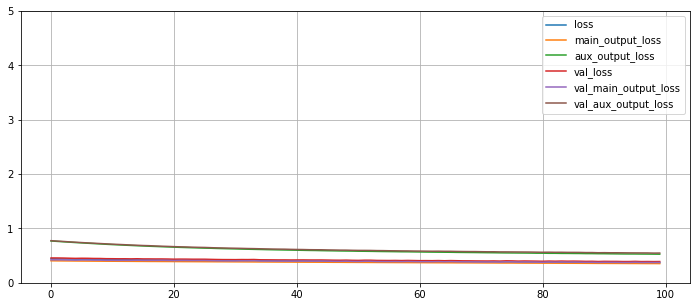

In [133]:
pd.DataFrame(hist.history).plot(figsize=(12,5))
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.show()

In [134]:
import os

In [135]:
root_logdir = os.path.join(os.curdir, "my_logs")
root_logdir

'.\\my_logs'

In [136]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [137]:
root_logdir = get_run_logdir()

In [139]:
tensorboad_cb = keras.callbacks.TensorBoard(root_logdir)
hist = model.fit((X_train_A, X_train_B), [y_train,y_train], 
                     epochs=100, 
                     callbacks=[checkpoint_cb,early_stopping_cb, tensorboad_cb],
                     validation_data=((X_valid_A, X_valid_B), [y_valid,y_valid]))

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3702 - main_output_loss: 0.3530 - aux_output_loss: 0.5255 - val_loss: 0.3906 - val_main_output_loss: 0.3733 - val_aux_output_loss: 0.5463
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3698 - main_output_loss: 0.3525 - aux_output_loss: 0.5251 - val_loss: 0.3890 - val_main_output_loss: 0.3717 - val_aux_output_loss: 0.5452
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3690 - main_output_loss: 0.3517 - aux_output_loss: 0.5238 - val_loss: 0.3907 - val_main_output_loss: 0.3737 - val_aux_output_loss: 0.5432
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3691 - main_output_loss: 0.3520 - aux_output_loss: 0.5231 - val_loss: 0.3871 - val_main_output_loss: 0.3698 - val_aux_output_loss: 0.5422
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3685 - main_output_loss: 0.3515 - aux_output_loss: 0.5221 - val

Epoch 39/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3553 - main_output_loss: 0.3395 - aux_output_loss: 0.4971 - val_loss: 0.3718 - val_main_output_loss: 0.3559 - val_aux_output_loss: 0.5152
Epoch 40/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3548 - main_output_loss: 0.3391 - aux_output_loss: 0.4960 - val_loss: 0.3723 - val_main_output_loss: 0.3565 - val_aux_output_loss: 0.5147
Epoch 41/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3550 - main_output_loss: 0.3394 - aux_output_loss: 0.4951 - val_loss: 0.3741 - val_main_output_loss: 0.3585 - val_aux_output_loss: 0.5146
Epoch 42/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3544 - main_output_loss: 0.3387 - aux_output_loss: 0.4955 - val_loss: 0.3737 - val_main_output_loss: 0.3581 - val_aux_output_loss: 0.5140
Epoch 43/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3540 - main_output_loss: 0.3384 - aux_output_loss: 0.4944 

Epoch 77/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3441 - main_output_loss: 0.3297 - aux_output_loss: 0.4736 - val_loss: 0.3596 - val_main_output_loss: 0.3449 - val_aux_output_loss: 0.4919
Epoch 78/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3437 - main_output_loss: 0.3293 - aux_output_loss: 0.4734 - val_loss: 0.3615 - val_main_output_loss: 0.3471 - val_aux_output_loss: 0.4907
Epoch 79/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3438 - main_output_loss: 0.3294 - aux_output_loss: 0.4729 - val_loss: 0.3618 - val_main_output_loss: 0.3474 - val_aux_output_loss: 0.4913
Epoch 80/100
363/363 [==============================] - 2s 4ms/step - loss: 0.3433 - main_output_loss: 0.3289 - aux_output_loss: 0.4722 - val_loss: 0.3621 - val_main_output_loss: 0.3477 - val_aux_output_loss: 0.4914
Epoch 81/100
363/363 [==============================] - 2s 5ms/step - loss: 0.3429 - main_output_loss: 0.3286 - aux_output_loss: 0.4719 